**ZOMATO DATA ANALYSIS*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe=pd.read_csv("/content/Zomato data set.csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# QUESTION


Q1.  What type of restaurant do the majority of customers order from?
Q2.  How many votes has each type of restaurant received from customers?
Q3.  What are the rating that the majority of restaurants have
     receiveds?
Q4.  Zomato has observed that most couples order most of their foods
     online.What is their average spending on each other?
Q5.  Which mode (online/offline) has received the maximum rating?
Q6.  Which type of restaurant received more offline orders, so that zomato can provide customers with some good offers?

In [3]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

dataframe['rate']=dataframe ['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet



# Q1. What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'type of restaurant')

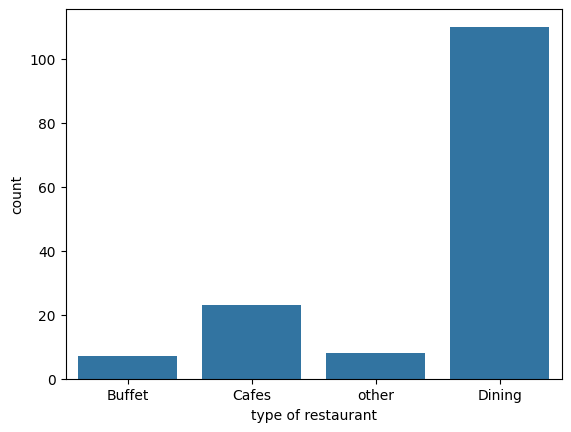

In [5]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")


# Q2. How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'votes')

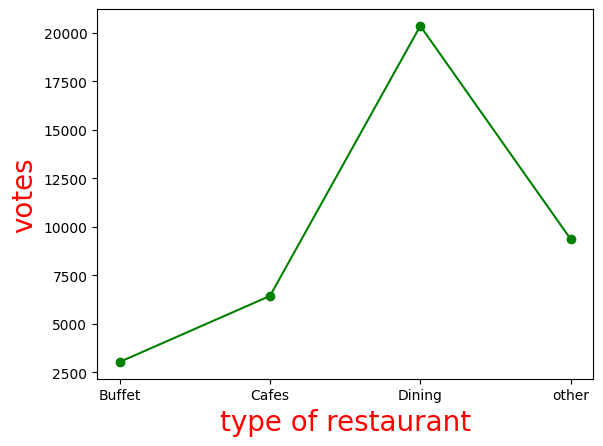

In [7]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("type of restaurant",c="red",size=20)
plt.ylabel("votes",c="red",size=20)

# Q3. What are the rating that the majority of restaurants have received?

In [9]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


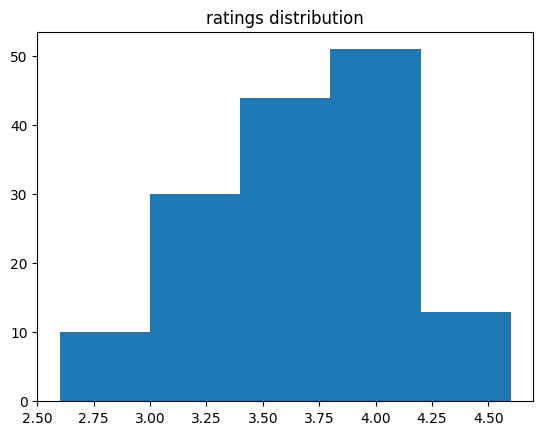

In [10]:
plt.hist(dataframe['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

# Q4. Zomato has observed that most couples order most of their foods online.What is their average spending on each other?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

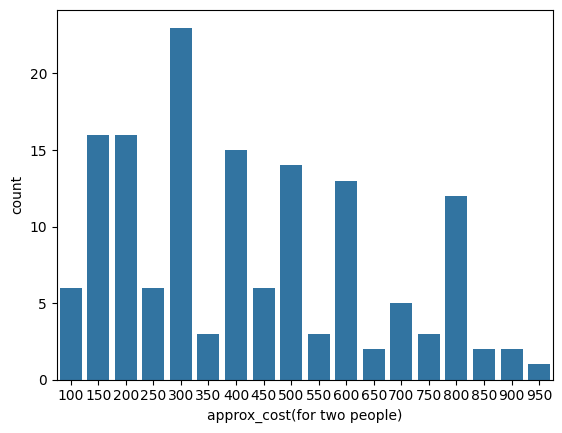

In [11]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Q5. Which mode (online/offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

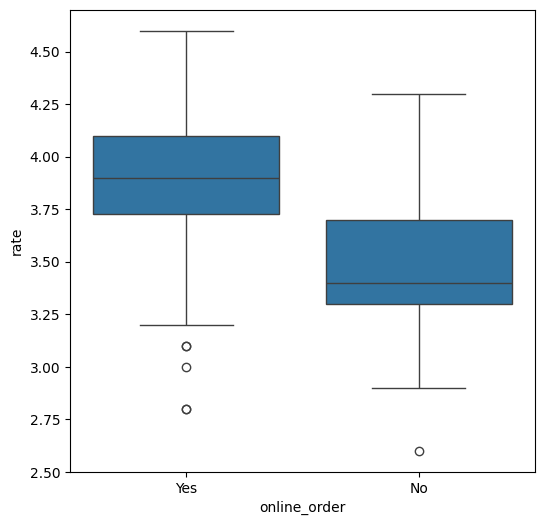

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

# Q6. Which type of restaurant received more offline orders, so that zomato can provide customers with some good offers?

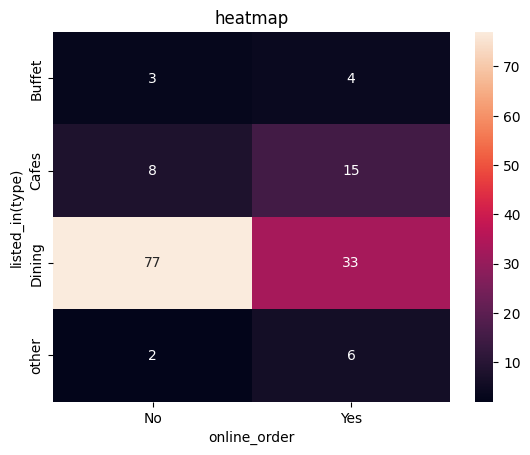

In [18]:
pivot_plot=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_plot, annot=True ,fmt='d')
plt.title("heatmap")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()